In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import folium
from folium import plugins
# from matplotlib.widgets import Slider

# %matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (6,4)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [154]:
df = pd.read_csv('/Users/mahmooooodie/Downloads/taker_buy_sell_volume.csv')
df.head(5)

,timestamp,buy_vol,sell_vol,buy_sell_ratio
0,1690233300000,172.917,125.523,1.3776
1,1690233600000,483.703,271.094,1.7843
2,1690233900000,324.171,223.937,1.4476
3,1690234200000,115.396,163.170,0.7072
4,1690234500000,841.502,499.905,1.6833


As you can see, the dataset imported above has 4 columns:
- timestamp
- buy_vol
- sell_vol
- buy_sell_ratio

But timestamp column is in terms of milliseconds and we have to convert it into a readable date and time, so I have converted it first, and then proceeded to split it up into two separate columns: day and time.

In [155]:
df['time'] = pd.to_datetime(df['timestamp'], unit='ms')

In [156]:
df.head()

,timestamp,buy_vol,sell_vol,buy_sell_ratio,time
0,1690233300000,172.917,125.523,1.3776,2023-07-24 21:15:00
1,1690233600000,483.703,271.094,1.7843,2023-07-24 21:20:00
2,1690233900000,324.171,223.937,1.4476,2023-07-24 21:25:00
3,1690234200000,115.396,163.170,0.7072,2023-07-24 21:30:00
4,1690234500000,841.502,499.905,1.6833,2023-07-24 21:35:00


In [157]:
df.drop(columns = 'timestamp', inplace = True)

In [158]:
new_name = {'time':'time_gmt'}
df.rename(columns = new_name, inplace = True )

In [159]:
df.head()

,buy_vol,sell_vol,buy_sell_ratio,time_gmt
0,172.917,125.523,1.3776,2023-07-24 21:15:00
1,483.703,271.094,1.7843,2023-07-24 21:20:00
2,324.171,223.937,1.4476,2023-07-24 21:25:00
3,115.396,163.170,0.7072,2023-07-24 21:30:00
4,841.502,499.905,1.6833,2023-07-24 21:35:00


In [160]:
column_to_move = 'time_gmt'
new_column_order = [column_to_move] + [col for col in df.columns if col != column_to_move]
df = df[new_column_order]

In [161]:
df.sample(5)

,time_gmt,buy_vol,sell_vol,buy_sell_ratio
11259,2023-09-01 23:30:00,131.987,62.453,2.1134
1805,2023-07-31 03:40:00,632.429,178.397,3.5451
2273,2023-08-01 18:40:00,619.287,624.573,0.9915
789,2023-07-27 15:00:00,1542.371,2848.329,0.5415
9755,2023-08-27 18:10:00,180.974,173.398,1.0437


In [162]:
df['day'] = df['time_gmt'].dt.day_name()
df['hour'] = df['time_gmt'].dt.hour

In [163]:
df.sample(10)

,time_gmt,buy_vol,sell_vol,buy_sell_ratio,day,hour
790,2023-07-27 15:05:00,994.544,1943.667,0.5117,Thursday,15
6522,2023-08-16 12:45:00,1971.810,1177.259,1.6749,Wednesday,12
9331,2023-08-26 06:50:00,69.133,18.437,3.7497,Saturday,6
12099,2023-09-04 21:30:00,266.449,367.351,0.7253,Monday,21
9992,2023-08-28 13:55:00,298.954,275.108,1.0867,Monday,13
6143,2023-08-15 05:10:00,318.182,335.708,0.9478,Tuesday,5
11510,2023-09-02 20:25:00,68.367,79.227,0.8629,Saturday,20
3860,2023-08-07 06:55:00,201.921,433.219,0.4661,Monday,6
12046,2023-09-04 17:05:00,101.655,152.613,0.6661,Monday,17
3132,2023-08-04 18:15:00,887.121,1223.129,0.7253,Friday,18


In [164]:
df['time'] = df['time_gmt'].dt.strftime('%H:%M')
df.sample()

,time_gmt,buy_vol,sell_vol,buy_sell_ratio,day,hour,time
2944,2023-08-04 02:35:00,152.057,74.155,2.0505,Friday,2,02:35


In [165]:
df.shape

(13768, 7)

In [166]:
new_column_order = ['time_gmt'] + ['day'] + ['time'] + [col for col in df.columns if col != column_to_move]
df = df[new_column_order]
df.head()

,time_gmt,day,time,buy_vol,sell_vol,buy_sell_ratio,day,hour,time
0,2023-07-24 21:15:00,Monday,21:15,172.917,125.523,1.3776,Monday,21,21:15
1,2023-07-24 21:20:00,Monday,21:20,483.703,271.094,1.7843,Monday,21,21:20
2,2023-07-24 21:25:00,Monday,21:25,324.171,223.937,1.4476,Monday,21,21:25
3,2023-07-24 21:30:00,Monday,21:30,115.396,163.170,0.7072,Monday,21,21:30
4,2023-07-24 21:35:00,Monday,21:35,841.502,499.905,1.6833,Monday,21,21:35


In [167]:
df = df.iloc[:, :-3]

In [168]:
df.head()

,time_gmt,day,time,buy_vol,sell_vol,buy_sell_ratio
0,2023-07-24 21:15:00,Monday,21:15,172.917,125.523,1.3776
1,2023-07-24 21:20:00,Monday,21:20,483.703,271.094,1.7843
2,2023-07-24 21:25:00,Monday,21:25,324.171,223.937,1.4476
3,2023-07-24 21:30:00,Monday,21:30,115.396,163.170,0.7072
4,2023-07-24 21:35:00,Monday,21:35,841.502,499.905,1.6833


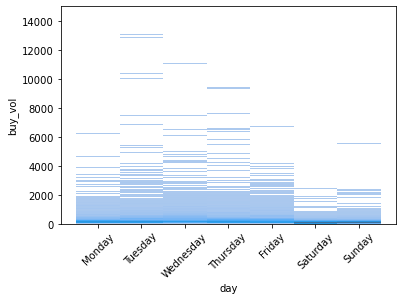

In [169]:
sns.histplot(data = df, x = 'day', y = 'buy_vol')
plt.ylim(0,15000)
plt.xticks(rotation = 45);

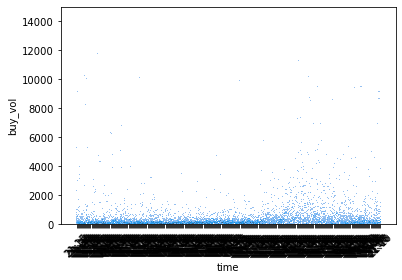

In [170]:
sns.histplot(data = df, x = 'time', y = 'buy_vol')
plt.ylim(0,15000)
plt.xticks(rotation = 45);

In [37]:
df.time.unique()

array(['21:15', '21:20', '21:25', '21:30', '21:35', '21:40', '21:45',
       '21:50', '21:55', '22:00', '22:05', '22:10', '22:15', '22:20',
       '22:25', '22:30', '22:35', '22:40', '22:45', '22:50', '22:55',
       '23:00', '23:05', '23:10', '23:15', '23:20', '23:25', '23:30',
       '23:35', '23:40', '23:45', '23:50', '23:55', '00:00', '00:05',
       '00:10', '00:15', '00:20', '00:25', '00:30', '00:35', '00:40',
       '00:45', '00:50', '00:55', '01:00', '01:05', '01:10', '01:15',
       '01:20', '01:25', '01:30', '01:35', '01:40', '01:45', '01:50',
       '01:55', '02:00', '02:05', '02:10', '02:15', '02:20', '02:25',
       '02:30', '02:35', '02:40', '02:45', '02:50', '02:55', '03:00',
       '03:05', '03:10', '03:15', '03:20', '03:25', '03:30', '03:35',
       '03:40', '03:45', '03:50', '03:55', '04:00', '04:05', '04:10',
       '04:15', '04:20', '04:25', '04:30', '04:35', '04:40', '04:45',
       '04:50', '04:55', '05:00', '05:05', '05:10', '05:15', '05:20',
       '05:25', '05:

In [39]:
top10 = 10
top_buy_times = df.nlargest(top10, 'buy_vol')

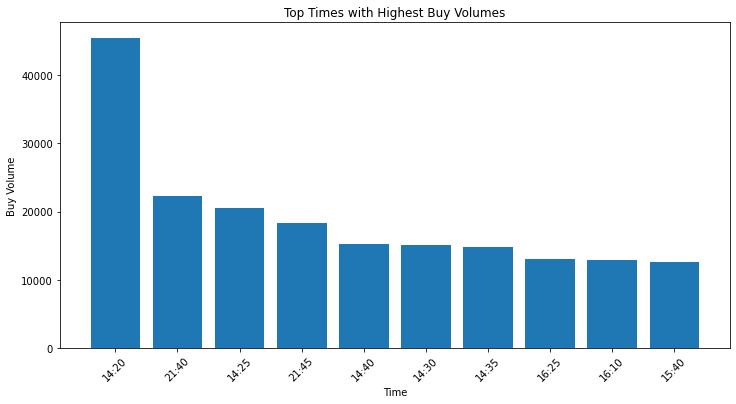

In [40]:
plt.figure(figsize=(12, 6))
plt.bar(top_buy_times['time'], top_buy_times['buy_vol'])
plt.xlabel('Time')
plt.ylabel('Buy Volume')
plt.title('Top Times with Highest Buy Volumes')
plt.xticks(rotation=45);

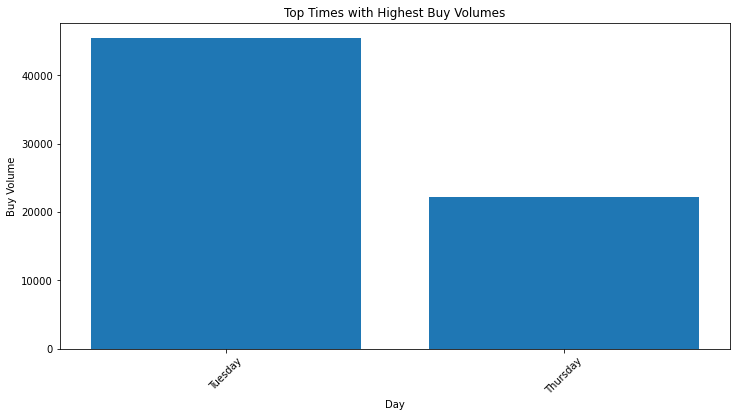

In [42]:
plt.figure(figsize=(12, 6))
plt.bar(top_buy_times['day'], top_buy_times['buy_vol'])
plt.xlabel('Day')
plt.ylabel('Buy Volume')
plt.title('Top Times with Highest Buy Volumes')
plt.xticks(rotation=45);

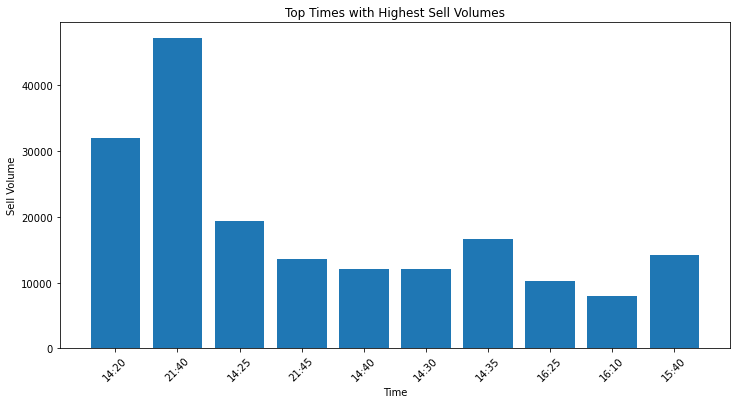

In [49]:
plt.figure(figsize=(12, 6))
plt.bar(top_buy_times['time'], top_buy_times['sell_vol'])
plt.xlabel('Time')
plt.ylabel('Sell Volume')
plt.title('Top Times with Highest Sell Volumes')
plt.xticks(rotation=45);

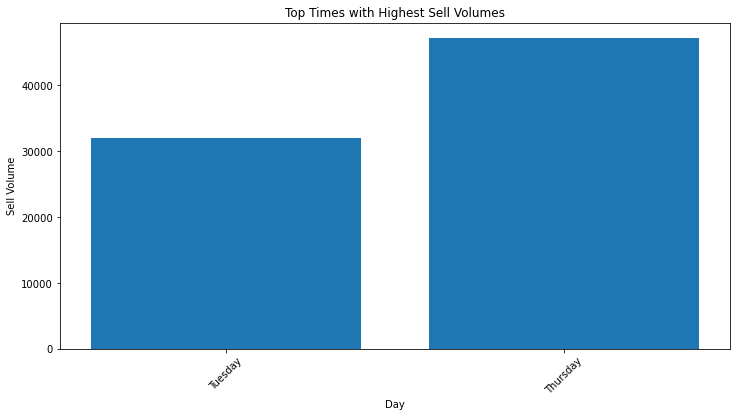

In [44]:
plt.figure(figsize=(12, 6))
plt.bar(top_buy_times['day'], top_buy_times['sell_vol'])
plt.xlabel('Day')
plt.ylabel('Sell Volume')
plt.title('Top Times with Highest Sell Volumes')
plt.xticks(rotation=45);

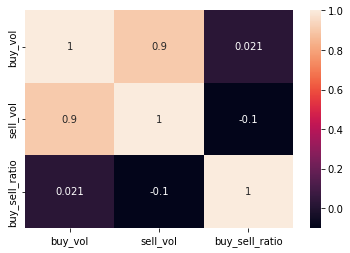

In [48]:
sns.heatmap(df.corr(), annot = True);

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13768 entries, 0 to 13767
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   time_gmt        13768 non-null  datetime64[ns]
 1   day             13768 non-null  object        
 2   time            13768 non-null  object        
 3   buy_vol         13768 non-null  float64       
 4   sell_vol        13768 non-null  float64       
 5   buy_sell_ratio  13768 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 645.5+ KB


In [51]:
df.buy_vol.max()

45381.252

In [52]:
df.sell_vol.max()

47180.398

In [53]:
df.buy_sell_ratio.max()

63.6341

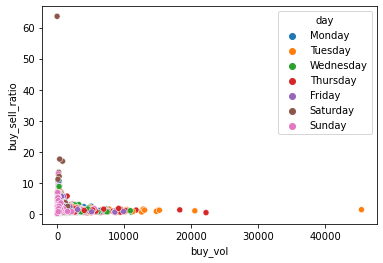

In [54]:
sns.scatterplot(data = df, x = 'buy_vol', y = 'buy_sell_ratio', hue = 'day');

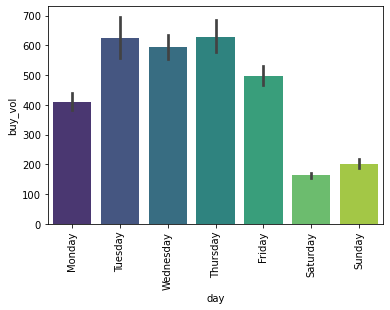

In [173]:
sns.barplot(data = df, x = 'day', y = 'buy_vol', palette = 'viridis')
plt.xticks(rotation = 90);